In [1]:
import os
import random
from collections import defaultdict, Counter
from statistics import mode

import numpy as np
import pandas as pd
import nibabel
import matplotlib.style
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# import seaborn as sns
import matplotlib
%matplotlib inline
import numpy as np
from nilearn import datasets
from nilearn import plotting
import nibabel as nib

from neurolang import frontend as fe

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/importlib/_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/amachlou/git/neurolang/neurolang/expression_pattern_matching.py:54: UserWarning: Warning in class FirstOrderLogicSolver overwrites {'universal_predicate', 'existential_predicate'} from base GenericSolver[typing.Any]
  warn(warn_message)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/importlib/_bootstrap_external.py:426: ImportWarning: Not importing directory /home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/mpl_toolkits: missing __init__
  _warnings.warn(msg.format(portions[0]), ImportWarning)


In [2]:
destrieux_dataset = datasets.fetch_atlas_destrieux_2009()
destrieux_map = nib.load(destrieux_dataset['maps'])
destrieux_dataset['labels']

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/numpy/lib/npyio.py:2278: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


rec.array([(  0, b'Background'), (  1, b'L G_and_S_frontomargin'),
           (  2, b'L G_and_S_occipital_inf'),
           (  3, b'L G_and_S_paracentral'),
           (  4, b'L G_and_S_subcentral'),
           (  5, b'L G_and_S_transv_frontopol'),
           (  6, b'L G_and_S_cingul-Ant'),
           (  7, b'L G_and_S_cingul-Mid-Ant'),
           (  8, b'L G_and_S_cingul-Mid-Post'),
           (  9, b'L G_cingul-Post-dorsal'),
           ( 10, b'L G_cingul-Post-ventral'), ( 11, b'L G_cuneus'),
           ( 12, b'L G_front_inf-Opercular'),
           ( 13, b'L G_front_inf-Orbital'),
           ( 14, b'L G_front_inf-Triangul'), ( 15, b'L G_front_middle'),
           ( 16, b'L G_front_sup'), ( 17, b'L G_Ins_lg_and_S_cent_ins'),
           ( 18, b'L G_insular_short'), ( 19, b'L G_occipital_middle'),
           ( 20, b'L G_occipital_sup'), ( 21, b'L G_oc-temp_lat-fusifor'),
           ( 22, b'L G_oc-temp_med-Lingual'),
           ( 23, b'L G_oc-temp_med-Parahip'), ( 24, b'L G_orbital'),
  

In [3]:
subjects = ['101309', '108121', '102008', '107321', '102311', '121315', '108525', '116524']
nl = fe.RegionFrontend()

Manual_sulci={}

for s in subjects:
    Manual_sulci[s]={}
    surface = nib.load('{}.L.pial.32k_fs_LR.surf.gii'.format(s))
    vertices = surface.darrays[0].data
    manual_sulci_gii = nib.load('{}_L_manual_segmentation.func.gii'.format(s))
    for darray in manual_sulci_gii.darrays:
        name = darray.meta.metadata['Name']
        name = name[:name.rfind('_')]
        points = vertices[darray.data.nonzero()].round(1)
        Manual_sulci[s][name] = points
#         print(f"{name}: number of points {points.shape[0]}")
    for name, points in Manual_sulci[s].items():
        ijk_points = nib.affines.apply_affine(np.linalg.inv(destrieux_map.affine), points).astype(int)
        region = fe.ExplicitVBR(
            ijk_points,
            destrieux_map.affine,
            img_dim=destrieux_map.shape
        )
        nl.add_region(region, result_symbol_name=f'{name}')

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/parse_gifti_fast.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  newarr = np.fromstring(zdec, dtype=dt)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='101309.L.pial.32k_fs_LR.surf.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='101309_L_manual_segmentation.func.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='108121.L.pial.32k_fs_LR.surf.gii'>
  parser.parse(fptr=file

In [4]:
surface_1 = nib.load('101309.R.pial.32k_fs_LR.surf.gii')
vertices_1 = surface_1.darrays[0].data
manual_sulci_gii_1 = nib.load('101309_R_manual_segmentation.func.gii')
manual_sulci_1 = dict()
for darray in manual_sulci_gii_1.darrays:
    name = darray.meta.metadata['Name']
    name = name[:name.rfind('_')]
    points = vertices_1[darray.data.nonzero()].round(1)
    manual_sulci_1[name] = points
#     print(f"{name}: number of points {points.shape[0]}")

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/parse_gifti_fast.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  newarr = np.fromstring(zdec, dtype=dt)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='101309.R.pial.32k_fs_LR.surf.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='101309_R_manual_segmentation.func.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))


In [5]:
surface_2 = nib.load('108121.R.pial.32k_fs_LR.surf.gii')
vertices_2 = surface_2.darrays[0].data
manual_sulci_gii_2 = nib.load('108121_R_manual_segmentation.func.gii')
manual_sulci_2 = dict()
for darray in manual_sulci_gii_2.darrays:
    name = darray.meta.metadata['Name']
    name = name[:name.rfind('_')]
    points = vertices_2[darray.data.nonzero()].round(1)
    manual_sulci_2[name] = points
#     print(f"{name}: number of points {points.shape[0]}")

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/parse_gifti_fast.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  newarr = np.fromstring(zdec, dtype=dt)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='108121.R.pial.32k_fs_LR.surf.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='108121_R_manual_segmentation.func.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))


In [6]:
surface_3 = nib.load('102008.R.pial.32k_fs_LR.surf.gii')
vertices_3 = surface_3.darrays[0].data
manual_sulci_gii_3 = nib.load('102008_R_manual_segmentation.func.gii')
manual_sulci_3 = dict()
for darray in manual_sulci_gii_3.darrays:
    name = darray.meta.metadata['Name']
    name = name[:name.rfind('_')]
    points = vertices_3[darray.data.nonzero()].round(1)
    manual_sulci_3[name] = points
#     print(f"{name}: number of points {points.shape[0]}")

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/parse_gifti_fast.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  newarr = np.fromstring(zdec, dtype=dt)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='102008.R.pial.32k_fs_LR.surf.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='102008_R_manual_segmentation.func.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))


In [7]:
surface_4 = nib.load('107321.R.pial.32k_fs_LR.surf.gii')
vertices_4 = surface_4.darrays[0].data
manual_sulci_gii_4 = nib.load('107321_R_manual_segmentation.func.gii')
manual_sulci_4 = dict()
for darray in manual_sulci_gii_4.darrays:
    name = darray.meta.metadata['Name']
    name = name[:name.rfind('_')]
    points = vertices_4[darray.data.nonzero()].round(1)
    manual_sulci_4[name] = points
#     print(f"{name}: number of points {points.shape[0]}")

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/parse_gifti_fast.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  newarr = np.fromstring(zdec, dtype=dt)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='107321.R.pial.32k_fs_LR.surf.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='107321_R_manual_segmentation.func.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))


In [8]:
surface_5 = nib.load('102311.R.pial.32k_fs_LR.surf.gii')
vertices_5 = surface_5.darrays[0].data
manual_sulci_gii_5 = nib.load('102311_R_manual_segmentation.func.gii')
manual_sulci_5 = dict()
for darray in manual_sulci_gii_5.darrays:
    name = darray.meta.metadata['Name']
    name = name[:name.rfind('_')]
    points = vertices_5[darray.data.nonzero()].round(1)
    manual_sulci_5[name] = points
#     print(f"{name}: number of points {points.shape[0]}")

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/parse_gifti_fast.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  newarr = np.fromstring(zdec, dtype=dt)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='102311.R.pial.32k_fs_LR.surf.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='102311_R_manual_segmentation.func.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))


In [9]:
surface_6 = nib.load('121315.R.pial.32k_fs_LR.surf.gii')
vertices_6 = surface_6.darrays[0].data
manual_sulci_gii_6 = nib.load('121315_R_manual_segmentation.func.gii')
manual_sulci_6 = dict()
for darray in manual_sulci_gii_6.darrays:
    name = darray.meta.metadata['Name']
    name = name[:name.rfind('_')]
    points = vertices_6[darray.data.nonzero()].round(1)
    manual_sulci_6[name] = points
#     print(f"{name}: number of points {points.shape[0]}")

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/parse_gifti_fast.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  newarr = np.fromstring(zdec, dtype=dt)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='121315.R.pial.32k_fs_LR.surf.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='121315_R_manual_segmentation.func.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))


In [10]:
surface_7 = nib.load('108525.R.pial.32k_fs_LR.surf.gii')
vertices_7 = surface_7.darrays[0].data
manual_sulci_gii_7 = nib.load('108525_R_manual_segmentation.func.gii')
manual_sulci_7 = dict()
for darray in manual_sulci_gii_7.darrays:
    name = darray.meta.metadata['Name']
    name = name[:name.rfind('_')]
    points = vertices_7[darray.data.nonzero()].round(1)
    manual_sulci_7[name] = points
#     print(f"{name}: number of points {points.shape[0]}")

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/parse_gifti_fast.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  newarr = np.fromstring(zdec, dtype=dt)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='108525.R.pial.32k_fs_LR.surf.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='108525_R_manual_segmentation.func.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))


In [11]:
surface_8 = nib.load('116524.R.pial.32k_fs_LR.surf.gii')
vertices_8 = surface_8.darrays[0].data
manual_sulci_gii_8 = nib.load('116524_R_manual_segmentation.func.gii')
manual_sulci_8 = dict()
for darray in manual_sulci_gii_8.darrays:
    name = darray.meta.metadata['Name']
    name = name[:name.rfind('_')]
    points = vertices_8[darray.data.nonzero()].round(1)
    manual_sulci_8[name] = points
#     print(f"{name}: number of points {points.shape[0]}")

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/parse_gifti_fast.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  newarr = np.fromstring(zdec, dtype=dt)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='116524.R.pial.32k_fs_LR.surf.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='116524_R_manual_segmentation.func.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))


In [12]:
RH_manual_sulci = [manual_sulci_1, manual_sulci_2, manual_sulci_3, manual_sulci_4, manual_sulci_5, manual_sulci_6,  manual_sulci_7, manual_sulci_8]

In [13]:
def tolerance_y_3(ys_origin_sulcus, ys_target_sulcus, length):
    # we consider I the origin
    before=set()
    overlaps=set()
    during=set()
    meets=set()
    starts=set()
    finishes=set()
    equals=set()
    after=set()
    Anterior_of=set()
    Posterior_of=set()
    During=set()
    J_minus = min(ys_target_sulcus)
#     print('J-:', J_minus)
    J_plus = max(ys_target_sulcus) + length
#     print('J+:', J_plus)
    
    I_boxes = set(ys_origin_sulcus)
    for x in I_boxes:
        I_minus = x
        I_plus = I_minus + length
        
        if I_minus < I_plus < J_minus < J_plus:
            before.add(x)
        if I_minus < J_minus < I_plus < J_plus:
            overlaps.add(x)
        if J_minus < I_minus < I_plus < J_plus:
            during.add(x)
        if I_minus < I_plus == J_minus < J_plus:
            meets.add(x)
        if I_minus == J_minus < I_plus < J_plus:
            starts.add(x)
        if J_minus < I_minus < I_plus == J_plus:
            finishes.add(x)
        if I_minus == J_minus < I_plus == J_plus:
            equals.add(x)
        if J_minus < J_plus < I_minus < I_plus:
            after.add(x)
    before_pc =  len(before) / len(I_boxes) * 100
    overlaps_pc =  len(overlaps) / len(I_boxes) * 100
    during_pc = len(during) / len(I_boxes) * 100
    meets_pc = len(meets) / len(I_boxes) * 100
    starts_pc = len(starts) / len(I_boxes) * 100
    finishes_pc = len(finishes) / len(I_boxes) * 100
    equals_pc = len(equals) / len(I_boxes) * 100
    after_pc = len(after) / len(I_boxes) * 100     
    
#     print('before', before_pc)
#     print('overlaps', overlaps_pc)
#     print('during', during_pc)
#     print('meets', meets_pc)
#     print('starts', starts_pc)
#     print('finishes', finishes_pc)
#     print('equals', equals_pc)
#     print('after', after_pc)
    
    x = np.arange(8)
    plt.bar(x, height= [before_pc, overlaps_pc, during_pc, meets_pc, starts_pc, finishes_pc, equals_pc, after_pc])
    plt.xticks(x+.5, ['before','overlaps','during','meets','starts','finishes','equals','after'])
    plt.axhline(y=80, color='r', linestyle='--')
    plt.show()
    values = [before_pc, overlaps_pc, during_pc, meets_pc, starts_pc, finishes_pc, equals_pc, after_pc]
    
    return values

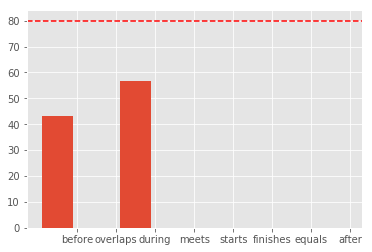

In [14]:
cs_prcs_1 = tolerance_y_3(manual_sulci_1['Central_sulcus'].T[1], manual_sulci_1['Precentral_sulcus'].T[1], length=.1)

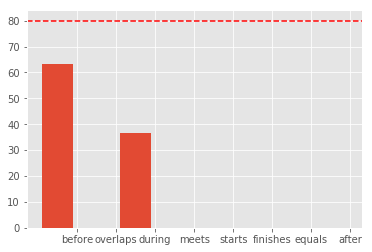

In [15]:
cs_prcs_2 = tolerance_y_3(manual_sulci_2['Central_sulcus'].T[1], manual_sulci_2['Precentral_sulcus'].T[1], length=.1)

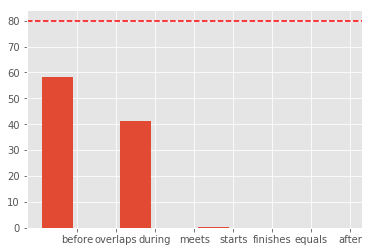

In [16]:
cs_prcs_3 = tolerance_y_3(manual_sulci_3['Central_sulcus'].T[1], manual_sulci_3['Precentral_sulcus'].T[1], length=.1)

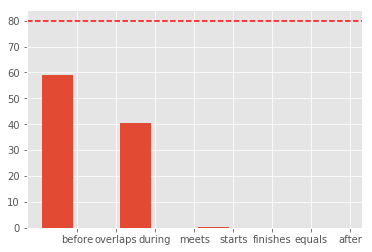

In [17]:
cs_prcs_4 = tolerance_y_3(manual_sulci_4['Central_sulcus'].T[1], manual_sulci_4['Precentral_sulcus'].T[1], length=.1)

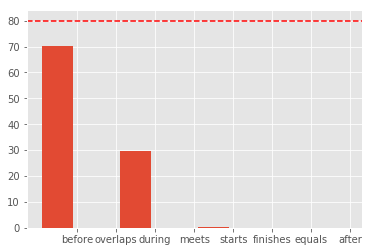

In [18]:
cs_prcs_5 = tolerance_y_3(manual_sulci_5['Central_sulcus'].T[1], manual_sulci_5['Precentral_sulcus'].T[1], length=.1)

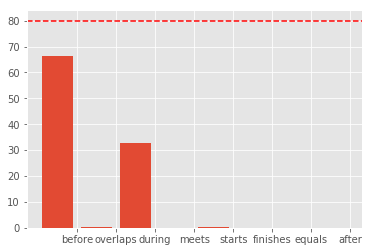

In [19]:
cs_prcs_6 = tolerance_y_3(manual_sulci_6['Central_sulcus'].T[1], manual_sulci_6['Precentral_sulcus'].T[1], length=.1)

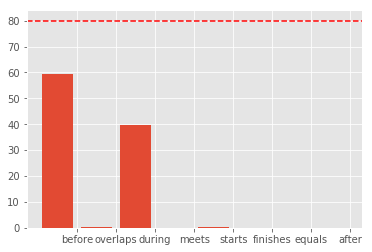

In [20]:
cs_prcs_7 = tolerance_y_3(manual_sulci_7['Central_sulcus'].T[1], manual_sulci_7['Precentral_sulcus'].T[1], length=.1)

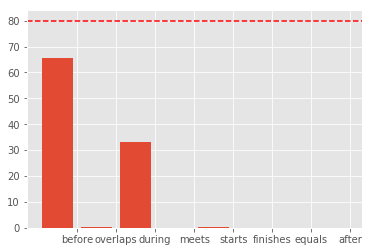

In [21]:
cs_prcs_8 = tolerance_y_3(manual_sulci_8['Central_sulcus'].T[1], manual_sulci_8['Precentral_sulcus'].T[1], length=.1)

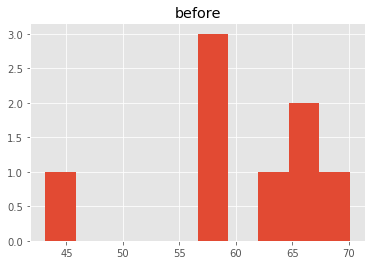

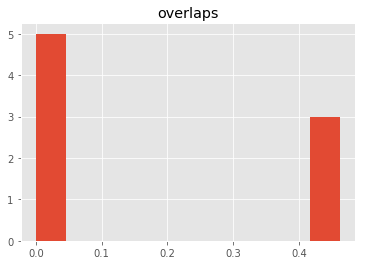

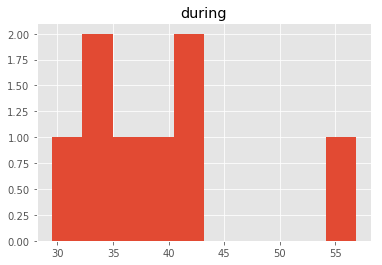

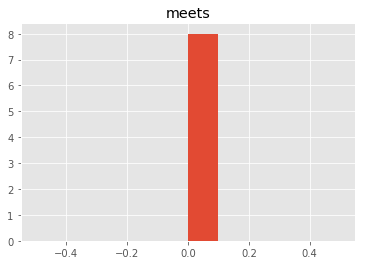

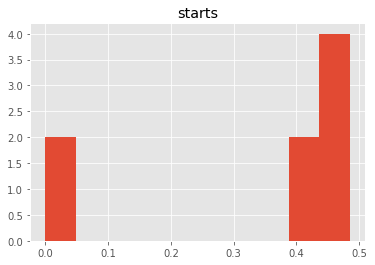

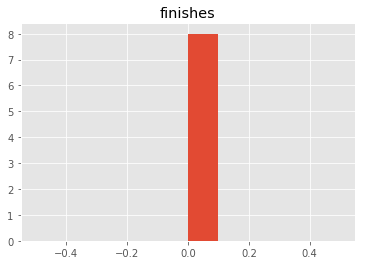

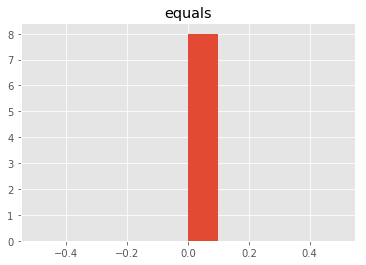

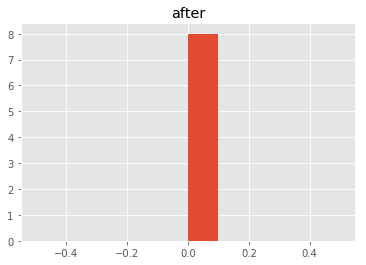

In [22]:
plots_cs_prcs = [cs_prcs_1, cs_prcs_2, cs_prcs_3, cs_prcs_4, cs_prcs_5, cs_prcs_6, cs_prcs_7, cs_prcs_8]
x = np.arange(8)

labels = ['before', 'overlaps', 'during', 'meets', 'starts', 'finishes', 'equals', 'after']

for label, r in zip(labels, np.array(plots_cs_prcs).T):
    plt.title(label)
    plt.hist(r)
    plt.show()

In [23]:
def tolerance_y_historgrams(individual_plots):
    # we consider I the origin
    subject_relationships = individual_plots
    
#     for s in subject_set:
#         relationships = (tolerance_y_3(s[origin_sulcus].T[1], s[target_sulcus].T[1], length))
#         subject_relationships.append(relationships)
        
    x = np.arange(8)
        #plt.bar(x, height = relationships)
        #plt.xticks(x+.5, ['before','overlaps','during','meets','starts','finishes','equals','after'])
        #plt.axhline(y=80, color='r', linestyle='--')
        #plt.title(s)
        #plt.show()
    
    labels =  ['before', 'overlaps', 'during', 'meets', 'starts', 'finishes', 'equals', 'after']
    for label, r in zip(labels, np.array(subject_relationships).T):
        plt.title(label)
        plt.hist(r)
        #plt.xlim(0, 100)
        plt.show()

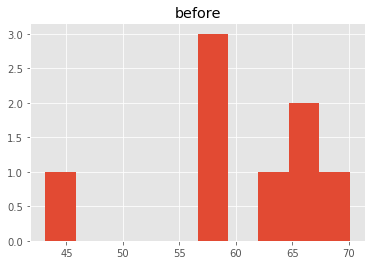

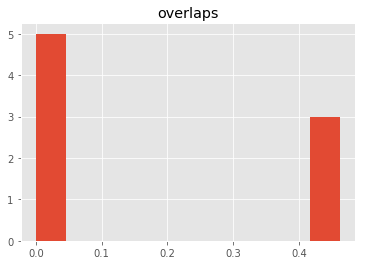

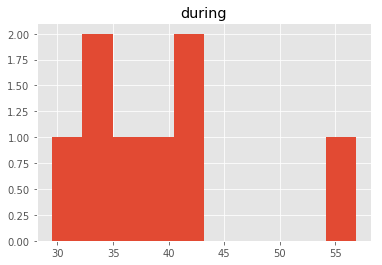

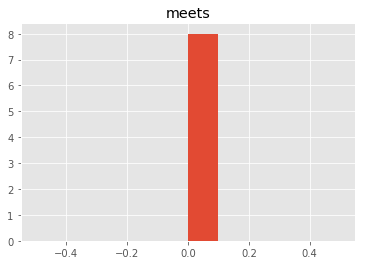

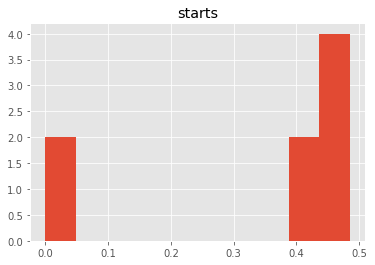

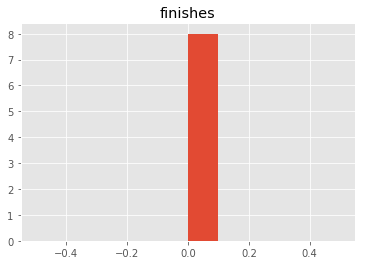

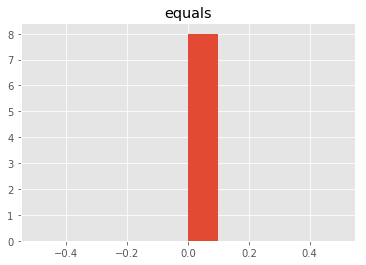

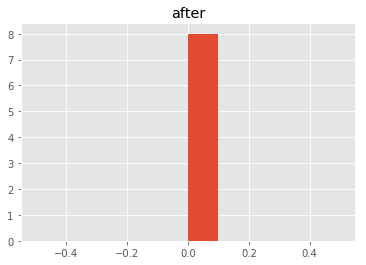

In [24]:
tolerance_y_historgrams(plots_cs_prcs)

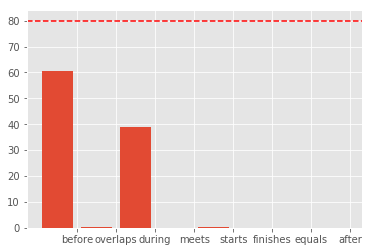

In [25]:
befores = []
overlapss = []
durings = []
meetss = []
startss = []
finishess = []
equalss = [] 
afters = []
for plot in plots_cs_prcs:
    befores.append(plot[0])
    overlapss.append(plot[1])
    durings.append(plot[2])
    meetss.append(plot[3])
    startss.append(plot[4])
    finishess.append(plot[5])
    equalss.append(plot[6])
    afters.append(plot[7])

x = np.arange(8)
plt.bar(x, height= [np.mean(befores), np.mean(overlapss), np.mean(durings), np.mean(meetss),
                    np.mean(startss), np.mean(finishess), np.mean(equalss), np.mean(afters)])
plt.xticks(x+.5, ['before','overlaps','during','meets','starts','finishes','equals','after'])
plt.axhline(y=80, color='r', linestyle='--')
plt.show()

In [26]:
def find_dominant_relationship(relationships, pair_analyses): 
    relations=[]
    for x in pair_analyses:
        relations.append(relationships[np.argmax(x)])
    keys, counts = np.unique(relations, return_counts=True)
    plt.bar(keys, counts)
    plt.show()
    return mode(relations), len(mode(relations)) / len(relations)

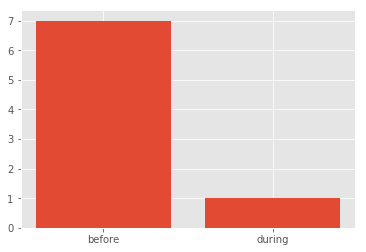

('before', 0.75)

In [27]:
find_dominant_relationship(labels, plots_cs_prcs)

In [28]:
Before=0
Overlaps=0
During=0
Meets=0
Starts=0
Finishes=0
Equals=0
After=0

for prcs in plots_cs_prcs:
    if np.argmax(prcs)==0:
        Before +=1 #.add(nl.symbols['Precentral_sulcus'])
    elif np.argmax(prcs)==1:
        Overlaps+=1
    elif np.argmax(prcs)==2:
        During+=1
    elif np.argmax(prcs)==3:
        Meets+=1
    elif np.argmax(prcs)==4:
        Starts+=1
    elif np.argmax(prcs)==5:
        Finishes+=1
    elif np.argmax(prcs)==6:
        Equals+=1
    elif np.argmax(prcs)==7:
        After+=1

In [29]:
Relationships = {}

Relationships['Before']=Before
Relationships['Overlaps']=Overlaps
Relationships['During']=During
Relationships['Meets']=Meets
Relationships['Starts']=Starts
Relationships['Finishes']=Finishes
Relationships['Equals']=Equals
Relationships['After']=After

inverse = [(value, key) for key, value in Relationships.items()]
largest = max(inverse)[1]
print (largest)

Before


In [30]:
before_final=set()
before_final.add(nl.symbols['Precentral_sulcus'])
before_dominant = nl.add_region_set(before_final, name='before_dominant')

In [31]:
before_dominant

before_dominant: typing.AbstractSet[neurolang.regions.Region] = ['Precentral_sulcus']